In [68]:
LOCAL_PATH = "C:\\Users\\kimke\OneDrive\Documents\\4th_year\semeter_B\Biological_networks_sadna\\network-analysis\\results\\full_flow\\17-05-2022--23-15-14"
import os
os.chdir(LOCAL_PATH)
ALGORITHN_RAN = "Louvain"
from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import pprint
import matplotlib.pyplot as plt



In [69]:
class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data


In [70]:
date_folder = "18-05-2022--16-40-09"
res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)

dfs_list = []
for network in sorted(os.listdir(res_dp), reverse=True):
    df_fp = os.path.join(res_dp, network, "results.df")
    if network.endswith(".log") or not os.path.exists(df_fp):
        continue
    print(network)
    df = pd.read_pickle(df_fp)
    
    _df_extra = df_extra(df)
    _df_extra.add_data_to_df("network", network)
    _df_extra.add_data_to_df("mu", network.split("_")[1])
    
    dfs_list.append(df)
    # add columns to df: network, mu
    
    

1000_0.6_9
1000_0.6_8
1000_0.6_7
1000_0.6_6
1000_0.6_5
1000_0.6_4
1000_0.6_3
1000_0.6_2
1000_0.6_1
1000_0.6_0
1000_0.5_9


In [71]:
df = pd.concat(dfs_list)
df.reset_index(inplace=True)
df.pop("index")
df

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,number_of_mega_nodes,iterations,time-sec,network,mu
0,Louvain,0.363148,0.361218,0.459500,0.422604,0.954,0.764099,30,17,None,None,NaN,NaN,0.162111,1000_0.6_9,0.6
1,LLP-100-34,0.363148,0.359602,0.487203,0.419766,0.964,0.784240,30,18,None,None,34.0,1.0,0.891387,1000_0.6_9,0.6
2,LLP-150-30,0.363148,0.364512,0.477085,0.426433,0.986,0.783130,30,17,None,None,30.0,1.0,0.423112,1000_0.6_9,0.6
3,LLP-200-37,0.363148,0.361932,0.567920,0.411652,0.962,0.828194,30,20,None,None,37.0,1.0,0.752109,1000_0.6_9,0.6
4,Louvain,0.362887,0.357415,0.604499,0.408613,0.956,0.848450,28,20,None,None,NaN,NaN,0.134373,1000_0.6_8,0.6
5,LLP-100-26,0.362887,0.351781,0.477246,0.410150,0.945,0.819115,28,19,None,None,26.0,1.0,0.351030,1000_0.6_8,0.6
6,LLP-150-34,0.362887,0.355275,0.550113,0.410165,0.969,0.839900,28,20,None,None,34.0,1.0,0.587031,1000_0.6_8,0.6
7,LLP-200-37,0.362887,0.351971,0.587509,0.401001,0.927,0.844861,28,21,None,None,37.0,1.0,1.075739,1000_0.6_8,0.6
8,Louvain,0.363978,0.360406,0.538295,0.412828,0.976,0.841190,30,21,None,None,NaN,NaN,0.126683,1000_0.6_7,0.6
9,LLP-100-42,0.363978,0.356538,0.507994,0.410055,0.946,0.801457,30,20,None,None,42.0,1.0,5.049603,1000_0.6_7,0.6


In [75]:
evals = ["avg_modularity", "std_modularity", "avg_jaccard", "std_jaccard"]
mus = ["all", "0.4", "0.5", "0.6"]
evals_dict = {}

for mu in mus:
    evals_dict[mu] = {}
    for _eval in evals:
        evals_dict[mu][_eval] = {}
        
for algo in df.algo.unique():
    for mu, evals in evals_dict.items():
        if mu == "all":
            algo_rows = df.loc[df["algo"]==algo]
        else:
            algo_rows = df.loc[df["algo"]==algo].loc[df["mu"]==mu]
            
        avg_modularity = algo_rows["modularity - algo"].mean()
        std_modularity = algo_rows["modularity - algo"].std()
        avg_jaccard = algo_rows["jaccard"].mean()
        std_jaccard = algo_rows["jaccard"].std()

        if algo.startswith("Neumann-ILP"):
            algo = algo.split("-")[1] + algo.split("-")[2]
            algo = algo.replace("ILP", "NLP")


        evals["avg_modularity"][algo] = avg_modularity
        evals["std_modularity"][algo] = std_modularity
        evals["avg_jaccard"][algo] = avg_jaccard
        evals["std_jaccard"][algo] = std_jaccard

    
#     algos_results[algo] = {"avg_modularity": avg_modularity, "std_modularity": std_modularity, 
#                            "avg_jaccard": avg_jaccard, "std_jaccard": std_jaccard}
pprint.pprint(evals_dict)
    


{'0.4': {'avg_jaccard': {'LLP-100-26': nan,
                         'LLP-100-29': nan,
                         'LLP-100-34': nan,
                         'LLP-100-36': nan,
                         'LLP-100-37': nan,
                         'LLP-100-39': nan,
                         'LLP-100-40': nan,
                         'LLP-100-41': nan,
                         'LLP-100-42': nan,
                         'LLP-100-44': nan,
                         'LLP-150-30': nan,
                         'LLP-150-31': nan,
                         'LLP-150-32': nan,
                         'LLP-150-33': nan,
                         'LLP-150-34': nan,
                         'LLP-150-36': nan,
                         'LLP-150-40': nan,
                         'LLP-150-42': nan,
                         'LLP-200-29': nan,
                         'LLP-200-30': nan,
                         'LLP-200-34': nan,
                         'LLP-200-35': nan,
                         'LLP-20

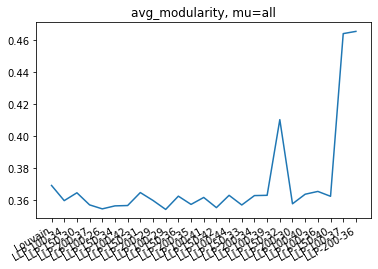

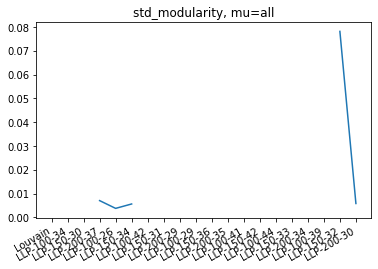

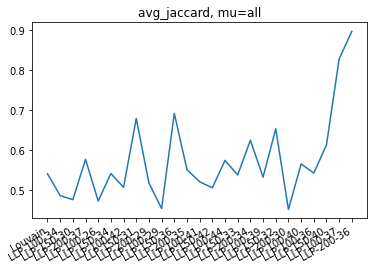

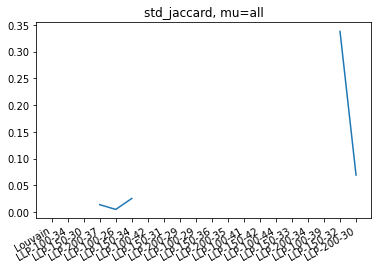

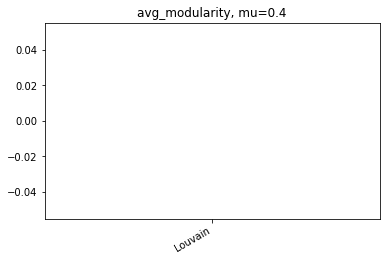

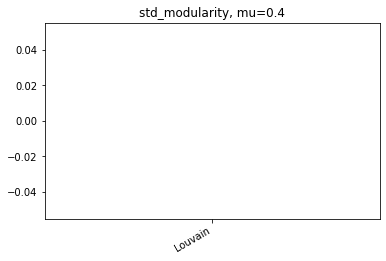

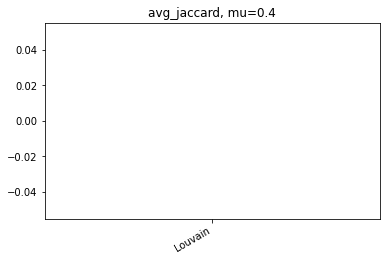

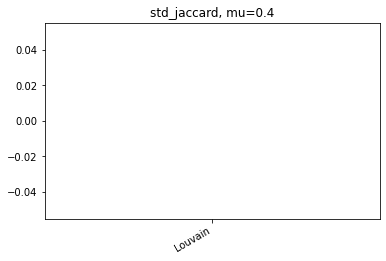

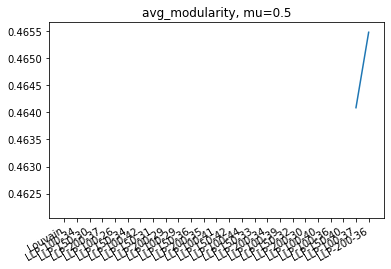

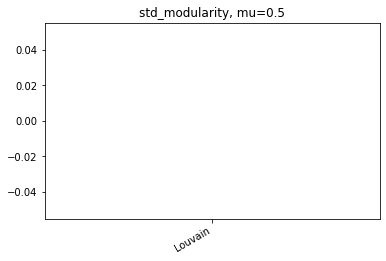

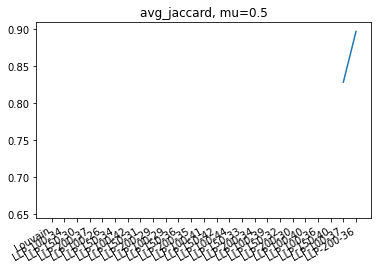

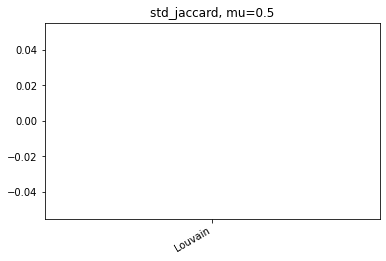

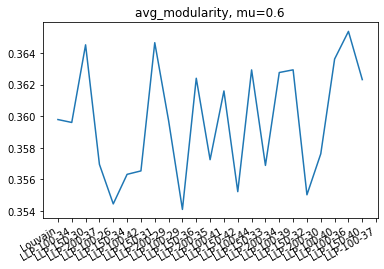

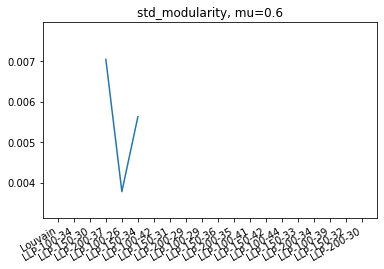

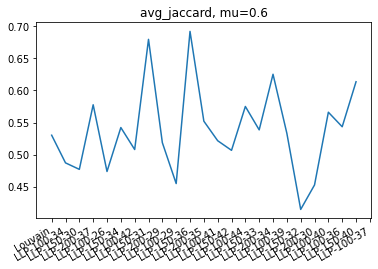

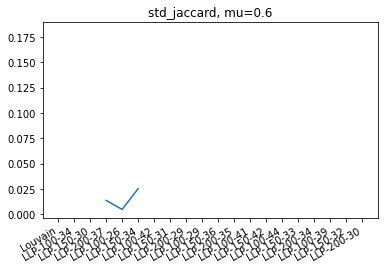

In [76]:
for mu, mu_evals in evals_dict.items():
    for eval_name, eval_data in mu_evals.items():
        fig, ax = plt.subplots()
        title = f'{eval_name}, mu={mu}'
        ax.set_title(title)
        fig.autofmt_xdate()
        x = eval_data.values()
        y = eval_data.keys()
        ax.plot(y, x)
        plt.savefig(os.path.join(res_dp,f'{title}.png'))